# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience </a>

In [1]:
# Bot check

# HW_ID: phds_sem6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.



In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## Задача 2
### Функция правдоподобия


Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [45]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample[0, :]), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

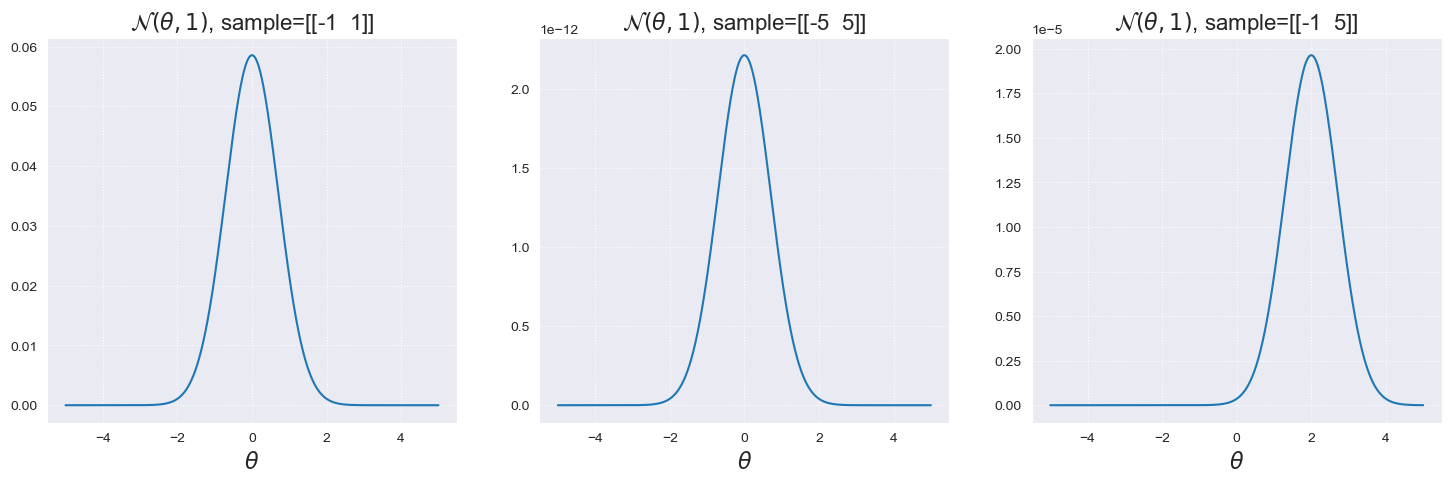

In [47]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

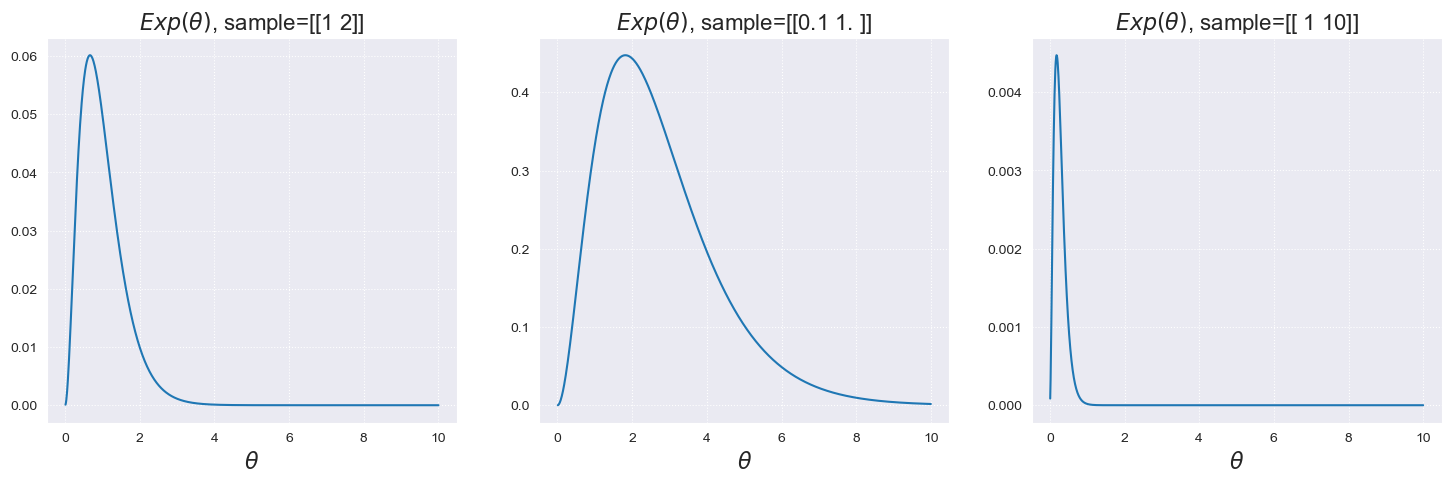

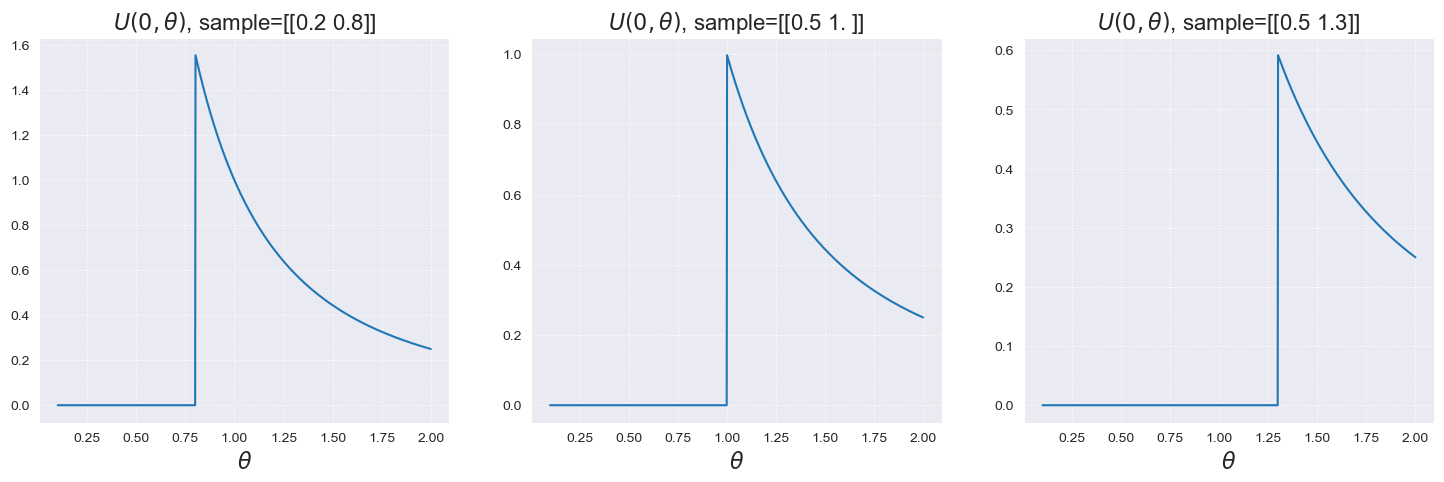

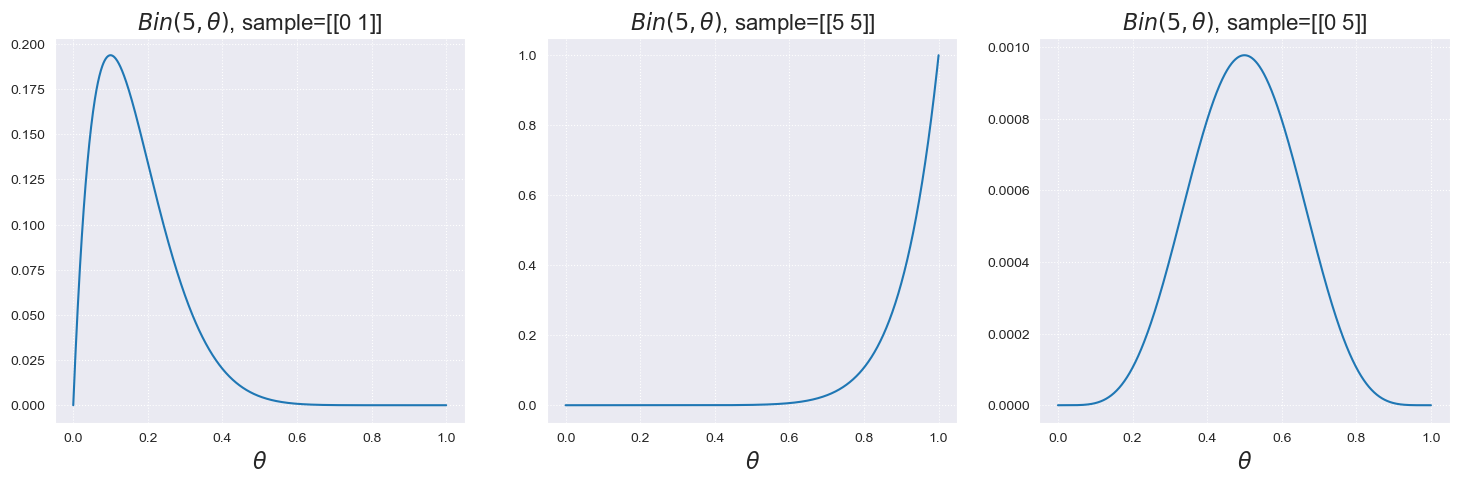

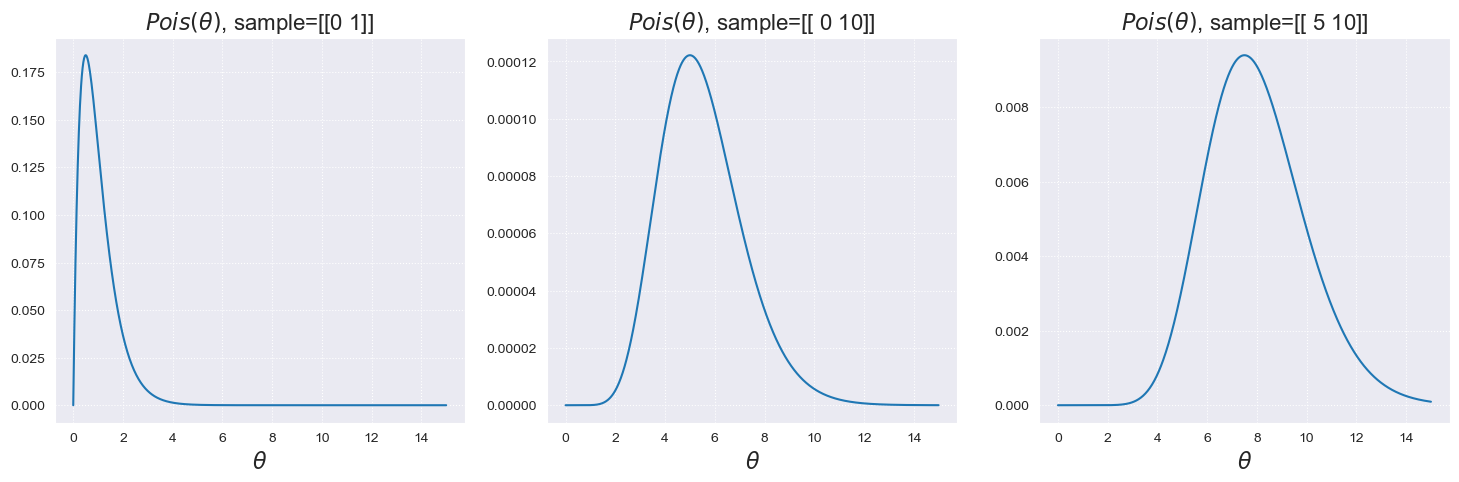

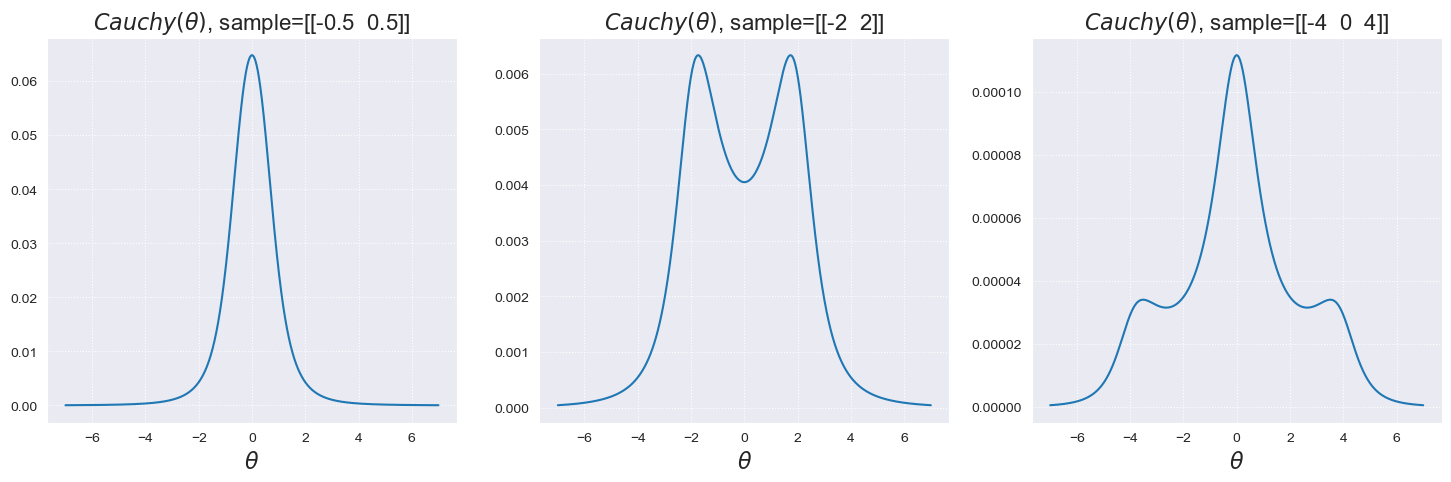

In [49]:
# ваш код
grid = np.linspace(-0.55, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid,
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

grid = np.linspace(0.1, 2, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(0, grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U(0, \\theta)$')

grid = np.linspace(0, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid,
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

grid = np.linspace(0, 15, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid,
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

grid = np.linspace(-7, 7, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Cauchy(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Выборка по разному влияет на сдвиг, масштаб и форма. Положение максимума для распределния
Экспоненциальное: 1, 2, 0.5
Равномерное: 0.8, 1, 1.3
Биномиальное: 0.15, 1, 0.5
Пуассона: 1, 5, 8
Коши: 0, -2/2, 0

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.



Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [50]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**
Так как scale = 1, loc = 0, то произвдение получившихся маленьких чисел примерно 0. Нужно логарифмировать и суммировать

In [55]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-141699.326184211
